# IMPORT LIBRARY AND DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.ticker import FuncFormatter
import math

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

import warnings
warnings.filterwarnings('ignore')

def print_data_info(df):
    dataDesc=[]
    for i in df.columns:
        unique_values = df[i].drop_duplicates()
        sample_count = min(2, len(unique_values))  # Only sample as many as available (max 2)
        samples = unique_values.sample(sample_count).values
        dataDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((((df[i].isna().sum())/len(df))*100), 2),
            df[i].nunique(),
            samples
        ])


    data_info = pd.DataFrame(dataDesc, columns=[
        'Data Features',
        'Data Types',
        'Null',
        'Null Percentage',
        'Unique',
        'Unique Sample'
    ])

    # Display Info
    print(f'Rows: {df.shape[0]:,}, Column: {df.shape[1]:,}')
    print('-' * 80)
    display(data_info)

In [3]:
df = pd.read_csv('credit_scoring.csv')
df

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
0,501000,41,13995609,5982664,0,624,0,0,-0.040
1,501001,58,13683833,3711198,0,809,0,0,0.001
2,501002,33,9417391,7172332,0,647,0,0,0.077
3,501003,45,6861811,8661056,0,450,0,0,0.038
4,501004,22,5640742,4520669,1,816,0,0,0.020
...,...,...,...,...,...,...,...,...,...
5995,506995,26,18253018,3690565,2,729,0,0,0.008
5996,506996,40,9944385,4082038,1,477,0,0,0.017
5997,506997,28,9048532,14760384,0,450,0,0,-0.054
5998,506998,51,6843160,11774594,0,561,0,0,0.026


In [4]:
print_data_info(df)

Rows: 6,000, Column: 9
--------------------------------------------------------------------------------


,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,application_id,int64,0,0.0,6000,"[503274, 506871]"
1,age,int64,0,0.0,39,"[48, 44]"
2,monthly_income,int64,0,0.0,6000,"[18068895, 12118601]"
3,loan_amount,int64,0,0.0,6000,"[8410502, 10264937]"
4,previous_defaults,int64,0,0.0,4,"[3, 1]"
5,credit_score,int64,0,0.0,550,"[588, 435]"
6,default,int64,0,0.0,2,"[0, 1]"
7,leak_col_good,int64,0,0.0,2,"[0, 1]"
8,leak_col_subtle,float64,0,0.0,239,"[-0.002, -0.061]"


# DATA PREPARATION

In [6]:
df_clean = df.copy()

**DROP FITUR LEAKAGE**

In [8]:
df_clean.drop(columns = ['leak_col_good', 'leak_col_subtle'], inplace=True)
df_clean

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,501000,41,13995609,5982664,0,624,0
1,501001,58,13683833,3711198,0,809,0
2,501002,33,9417391,7172332,0,647,0
3,501003,45,6861811,8661056,0,450,0
4,501004,22,5640742,4520669,1,816,0
...,...,...,...,...,...,...,...
5995,506995,26,18253018,3690565,2,729,0
5996,506996,40,9944385,4082038,1,477,0
5997,506997,28,9048532,14760384,0,450,0
5998,506998,51,6843160,11774594,0,561,0


,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,41,13995609,5982664,0,624,0
1,58,13683833,3711198,0,809,0
2,33,9417391,7172332,0,647,0
3,45,6861811,8661056,0,450,0
4,22,5640742,4520669,1,816,0
...,...,...,...,...,...,...
5995,26,18253018,3690565,2,729,0
5996,40,9944385,4082038,1,477,0
5997,28,9048532,14760384,0,450,0
5998,51,6843160,11774594,0,561,0


In [9]:
df_clean.describe(include='number')

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000


**DUPLICATED DATA**

In [11]:
print('Number of duplicate records found:', df_clean.duplicated().sum())

Number of duplicate records found: 0


**OUTLIER CHECKING AND DATA DISTRIBUTION**

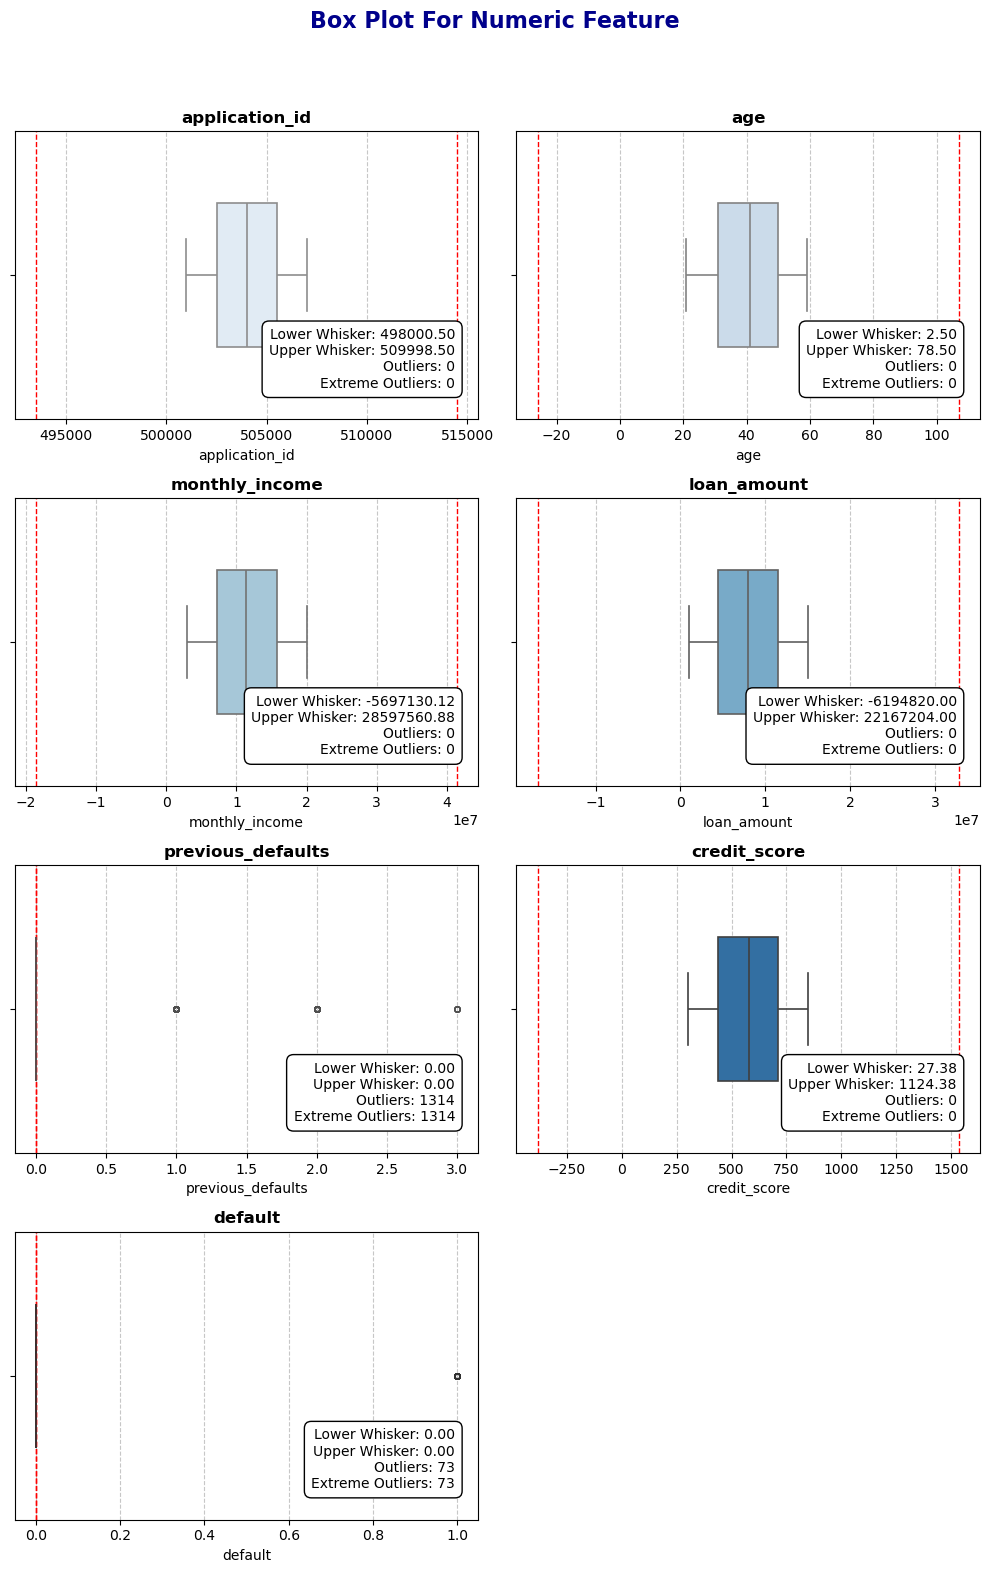

In [13]:
features = df_clean.select_dtypes(include='number').columns
rows = (len(features) // 2) + (len(features) % 2)
cols = 2

plt.figure(figsize=(cols * 5, rows * 4))
plt.suptitle('Box Plot For Numeric Feature', fontsize=16, fontweight='bold', color='darkblue')

colors = sns.color_palette("Blues", len(features))

for idx, column in enumerate(features):
    ax = plt.subplot(rows, cols, idx + 1)
    sns.boxplot(x=df_clean[column], color=colors[idx], width=0.5, fliersize=4, linewidth=1.2)
    plt.title(column, fontsize=12, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    q1 = df_clean[column].quantile(0.25)
    q3 = df_clean[column].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - (1.5 * iqr)
    upper_whisker = q3 + (1.5 * iqr)
    extreme_lower_whisker = q1 -( 3 * iqr)
    extreme_upper_whisker = q3 + ( 3 * iqr)
    outliers = df_clean[(df_clean[column] < lower_whisker) | (df_clean[column] > upper_whisker)][column]
    extreme_outliers = df_clean[(df_clean[column] < extreme_lower_whisker) | (df_clean[column] > extreme_upper_whisker)][column]
    
    ax.axvline(extreme_lower_whisker, color='red', linestyle='--', linewidth=1)
    ax.axvline(extreme_upper_whisker, color='red', linestyle='--', linewidth=1)

    info_text = f"Lower Whisker: {lower_whisker:.2f}\nUpper Whisker: {upper_whisker:.2f}\nOutliers: {len(outliers)}\nExtreme Outliers: {len(extreme_outliers)}"
    plt.text(0.95, 0.1, info_text, transform=ax.transAxes, fontsize=10,
             verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Berdasarkan box plot, fitur-fitur yang ada tidak memiliki outlier dan terdistribusi normal. Standard Scaler atau Robust Scaler dapat digunakan pada proses modelling. Histogram dan uji statistik akan digunakan untuk pengecekan lebih lanjut mengenai distribusi data.

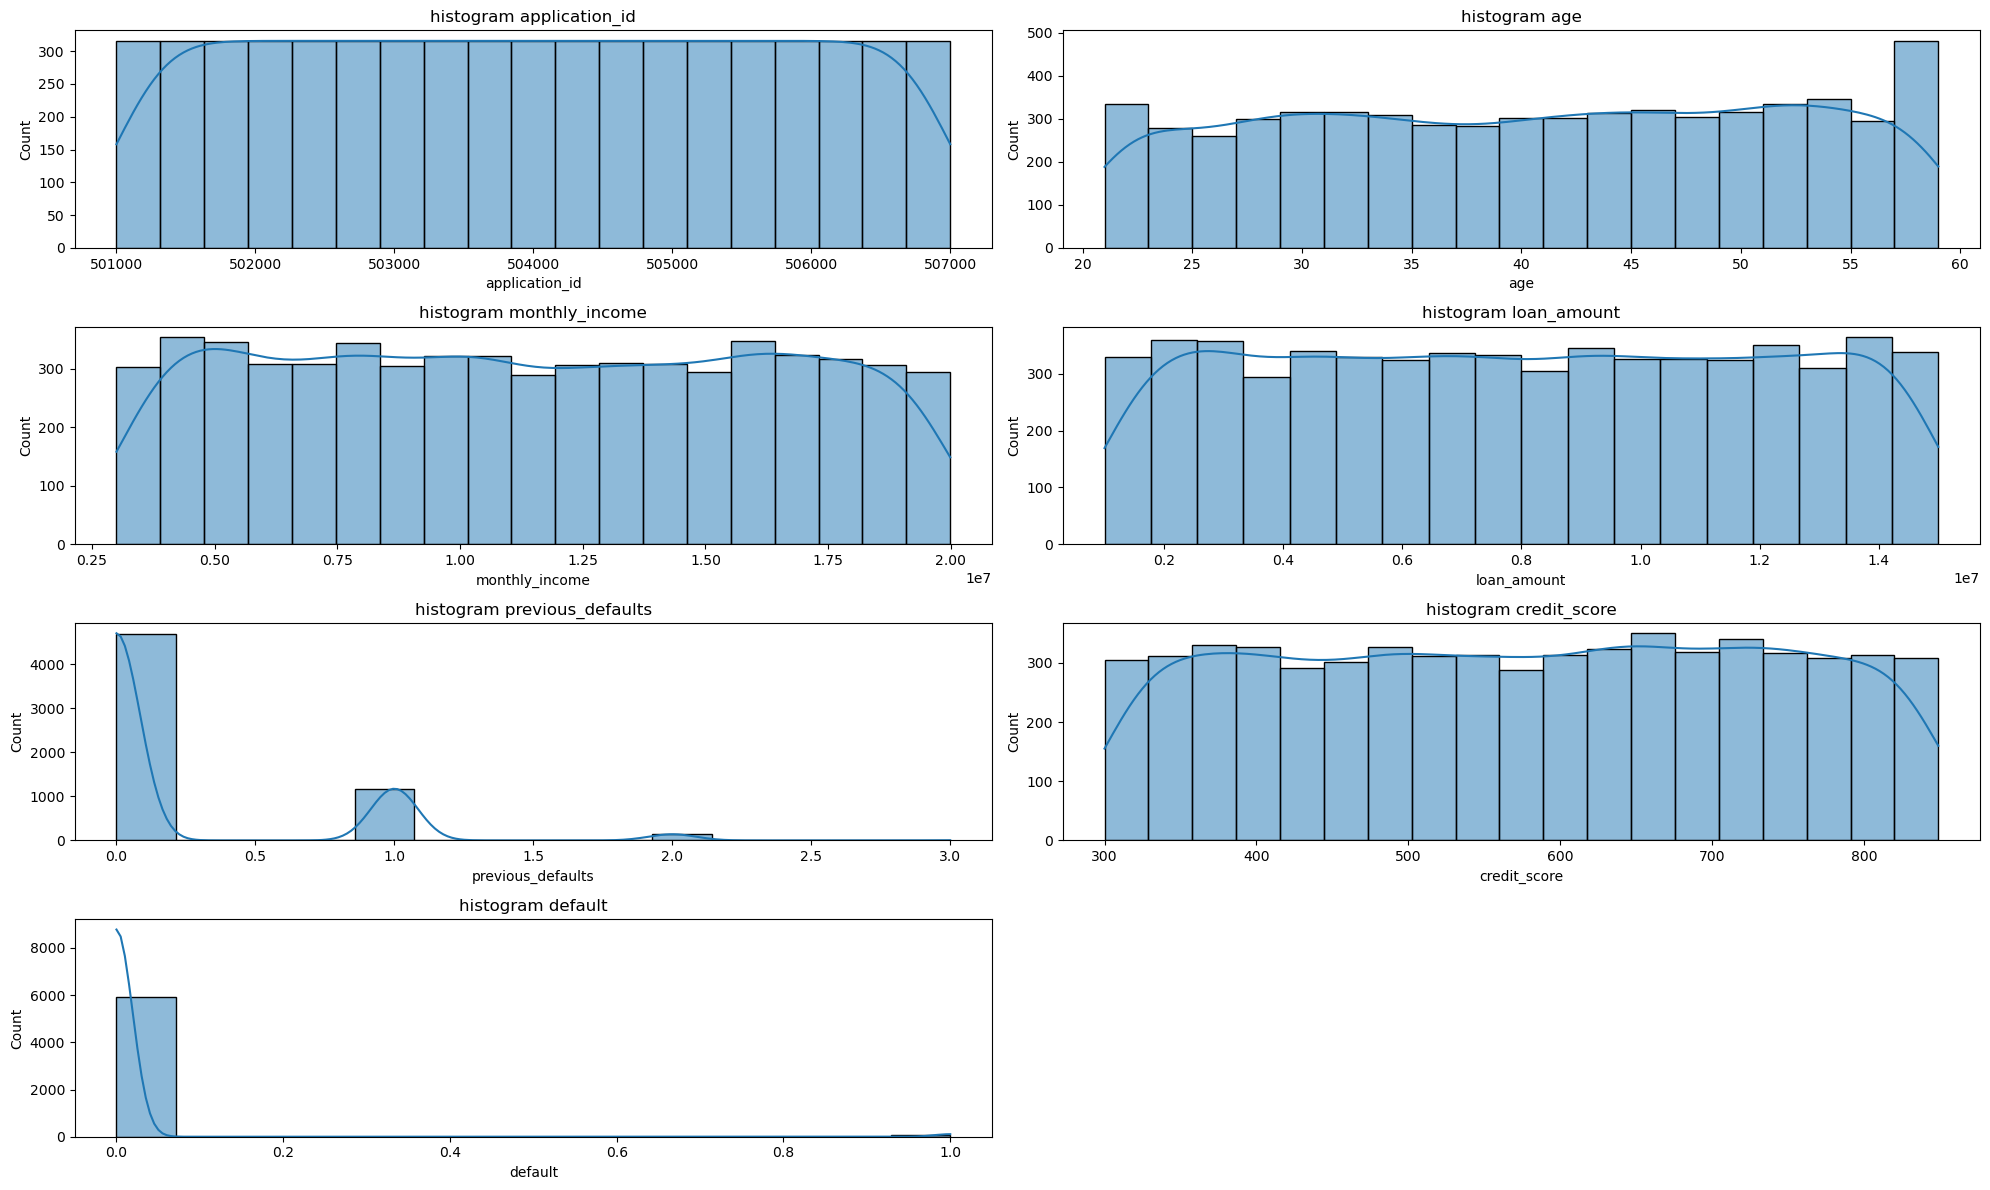

In [15]:
sum = len(df_clean.select_dtypes(include='number').columns)
row = math.ceil(sum / 2)  # misalnya 2 kolom per baris

fig = plt.figure(figsize=(20,row *3)) # horizontal, vertikal

count = 0
for kolom in df_clean.select_dtypes(include='number').columns:
    count += 1
    plt.subplot(row,2,count)
    sns.histplot(df_clean.select_dtypes(include='number')[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

In [16]:
from scipy.stats import normaltest

for col in df_clean.select_dtypes(include='number').columns:
    stat, p_value = normaltest(df_clean[col])
    print(f"Kolom '{col}':")
    print("p-value =", p_value)

    # Interpretasi hasil tes
    alpha = 0.05
    if p_value > alpha:
         print("Data is normally distributed (fail to reject H0)")
    else:
         print("Data is not normally distributed (reject H0)")
    print()

Kolom 'application_id':
p-value = 0.0
Data is not normally distributed (reject H0)

Kolom 'age':
p-value = 0.0
Data is not normally distributed (reject H0)

Kolom 'monthly_income':
p-value = 0.0
Data is not normally distributed (reject H0)

Kolom 'loan_amount':
p-value = 0.0
Data is not normally distributed (reject H0)

Kolom 'previous_defaults':
p-value = 0.0
Data is not normally distributed (reject H0)

Kolom 'credit_score':
p-value = 0.0
Data is not normally distributed (reject H0)

Kolom 'default':
p-value = 0.0
Data is not normally distributed (reject H0)



**ANOMALIES CHECKING**

**CLEANED DATA**

In [19]:
df_clean.drop(columns = 'application_id', inplace=True)

In [20]:
df_clean

,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,41,13995609,5982664,0,624,0
1,58,13683833,3711198,0,809,0
2,33,9417391,7172332,0,647,0
3,45,6861811,8661056,0,450,0
4,22,5640742,4520669,1,816,0
...,...,...,...,...,...,...
5995,26,18253018,3690565,2,729,0
5996,40,9944385,4082038,1,477,0
5997,28,9048532,14760384,0,450,0
5998,51,6843160,11774594,0,561,0


# DATA ANALYSIS

**Jumlah Application yang Default**

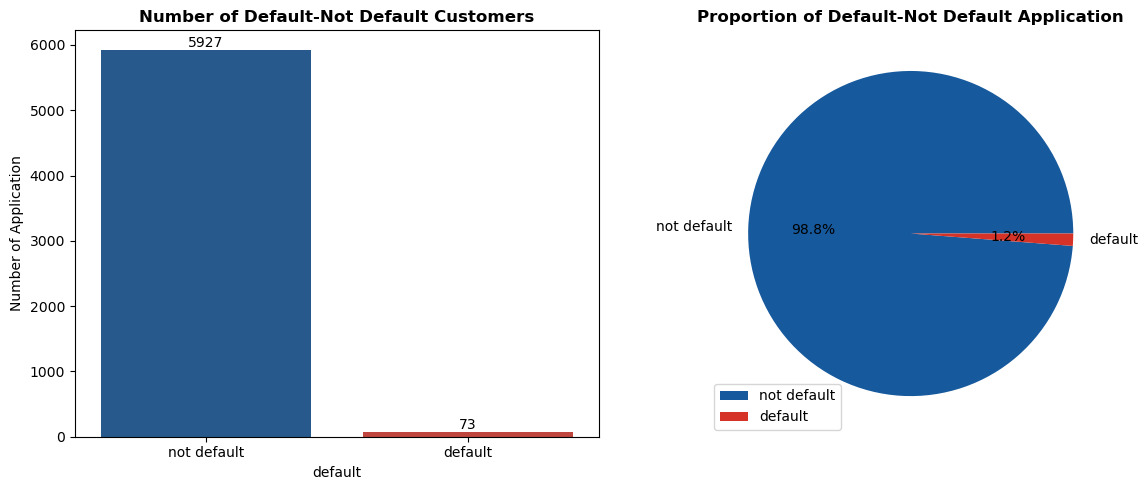

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Number of Default-Not Default Customers', fontweight='bold')
cntplot = sns.countplot(x=df_clean['default'], hue=df_clean['default'], palette=['#16599d', '#d53328'], legend=False)
for p in cntplot.patches:
    if p.get_height() > 1:
        cntplot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(ticks=[0,1], labels=['not default', 'default'])
plt.ylabel('Number of Application')

plt.subplot(1,2,2)
plt.title('Proportion of Default-Not Default Application', fontweight='bold')
plt.pie(x=df_clean['default'].value_counts(), labels=df_clean['default'].value_counts().reset_index()['default'].map({0:'not default', 1:'default'}), autopct='%.1f%%', colors=['#16599d', '#d53328'])
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

**HUBUNGAN FITUR DENGAN DEFAULT**

In [25]:
df_clean.columns

Index(['age', 'monthly_income', 'loan_amount', 'previous_defaults',
       'credit_score', 'default'],
      dtype='object')

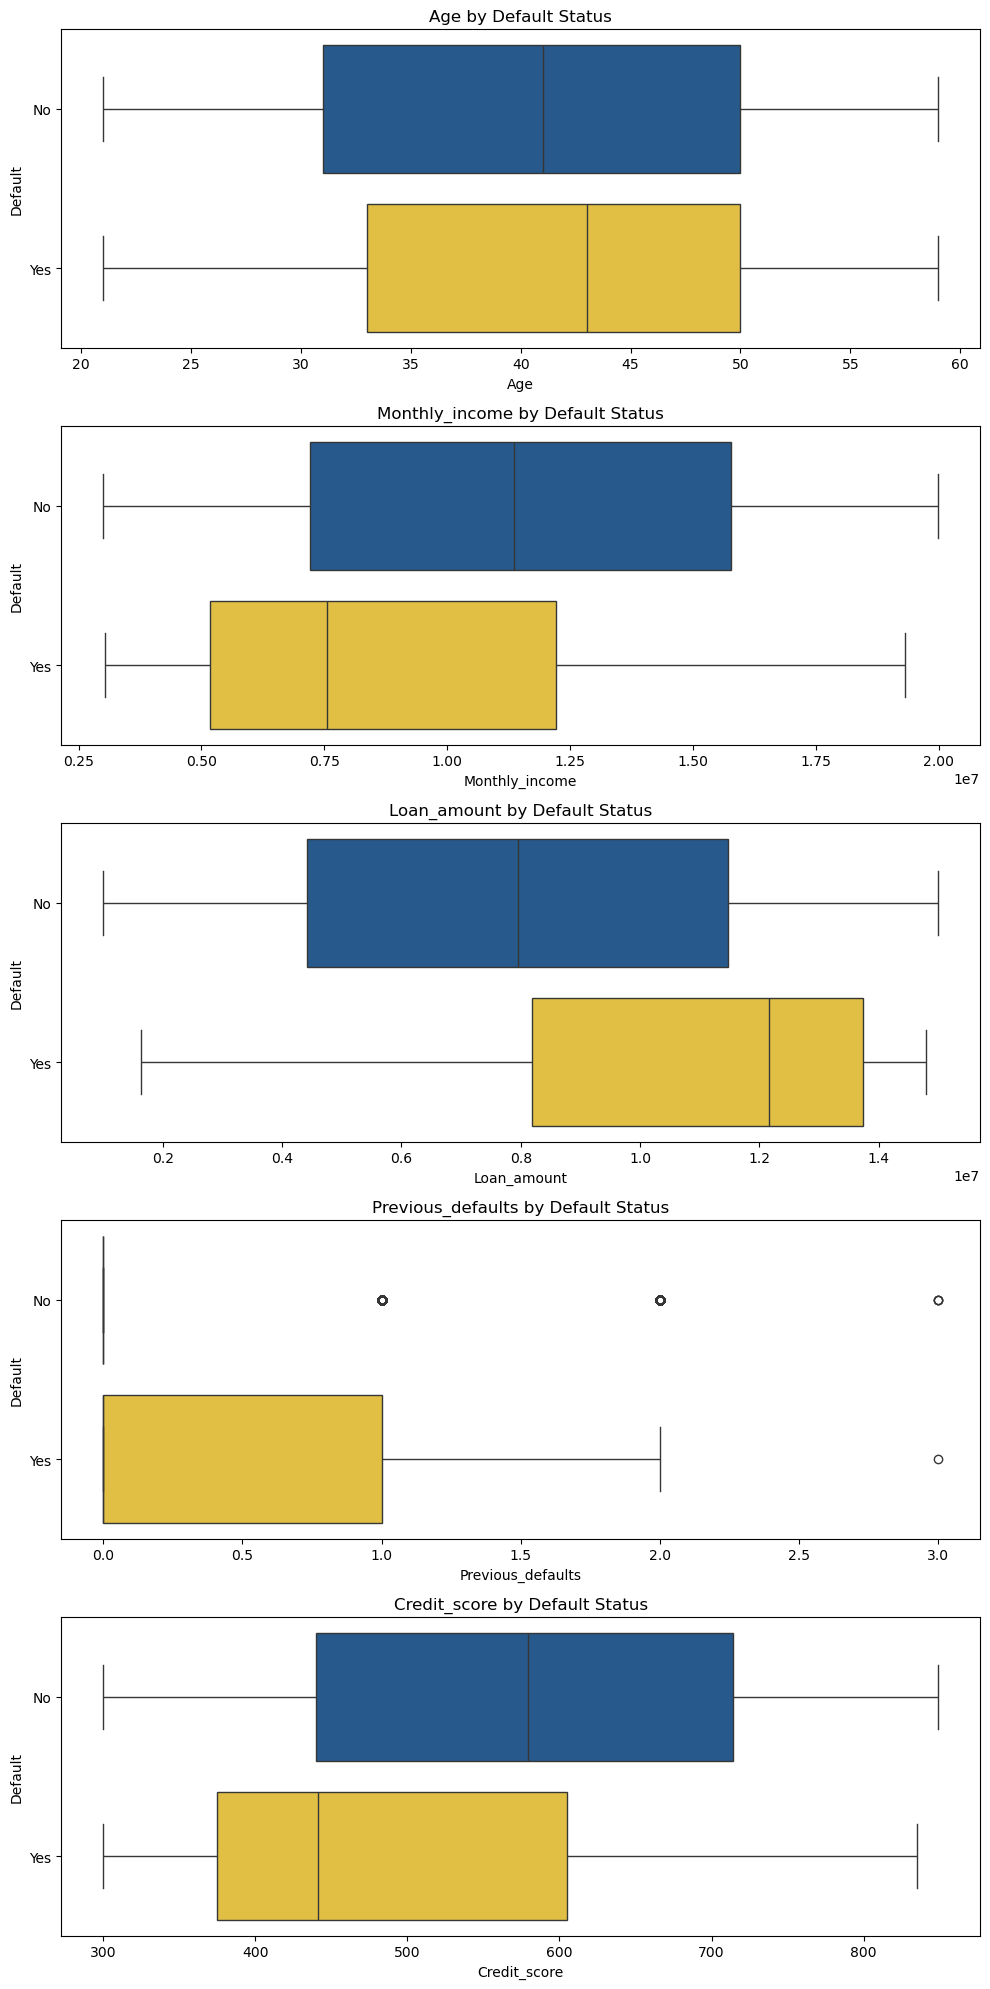

In [26]:
feature_cols = ['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

plt.figure(figsize=(10, 4 * len(feature_cols)))

for idx, col in enumerate(feature_cols):
    plt.subplot(len(feature_cols), 1, idx + 1)
    sns.boxplot(data=df_clean, y='default', x=col, palette=['#16599d', '#fbcd2b'], orient='h')
    plt.title(f'{col.capitalize()} by Default Status')
    plt.ylabel('Default')
    plt.xlabel(col.capitalize())
    plt.yticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


Berdasarkan Visualisasi Box Plot:
- Applicant yang default mayoritas memiliki umur diantara 33 Tahun - 50 tahun, lebih tinggi dari umur non-default applicant.
- Non-default applicant umumnya memiliki monthly income diantara 7000000 - 16000000, lebih tinggi dari default applicant (5000000 - 12000000).
- Default application memiliki loan amount yang lebih tinggi dibandingkan non-default application, yakni mayoritas pinjaman sebesar 8000000 - 14000000
- Default application memiliki credit score yang lebih rendah dari non-default, dengan default application mayoritas memiliki skor 380 s.d. 600.

Fitur loan amount dan credit score dapat menjadi fitur yang baik dalam pembuatan model.

# MODELLING

Modelling dilakukan dengan menggunakan Logistic Regression dan Gradient Boosting, baseline maupun yang di-tuning. Berdasarkan eksplorasi data, scaler yang akan digunakan adalah standard ataua robust scaler karena fitur terdistribusi normal. Karena label default imbalanced (label 1 hanya 1% dari total), resampler digunakan pada proses modelling, yakni: Random Over-Sampler, Random Under-Sampler, serta SMOTE.

In [31]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,FunctionTransformer
import category_encoders as ce #untuk binary encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import (RandomOverSampler, SMOTE)
from imblearn.under_sampling import (RandomUnderSampler, NearMiss)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve,precision_recall_curve, classification_report, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay, fbeta_score, make_scorer, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import  SelectFromModel
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
import time

In [32]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the given model on both the training and test datasets, 
    displaying classification reports, confusion matrix heatmaps, 
    ROC curves with AUC, and prints ROC AUC scores.
    """
    # Predict train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # ROC AUC Score
    auc_train = roc_auc_score(y_train, y_train_prob)
    auc_test = roc_auc_score(y_test, y_test_prob)
    print(f"ROC AUC Score - Train: {auc_train:.4f}")
    print(f"ROC AUC Score - Test:  {auc_test:.4f}\n")

    # Recall Score
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    print(f"Recall Score - Train: {recall_train:.4f}")
    print(f"Recall Score - Test:  {recall_test:.4f}\n")
    
    # Classification Report
    print("Classification Report - Train Data")
    print(classification_report(y_train, y_train_pred))
    
    print("\nClassification Report - Test Data")
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
        
    # Heatmap for Confusion Matrices
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=ax[0])
    ax[0].set_title('Confusion Matrix - Train Data')
    
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=ax[1])
    ax[1].set_title('Confusion Matrix - Test Data')

    plt.tight_layout()
    plt.show()

## CEK MULTICOLLINEARITY

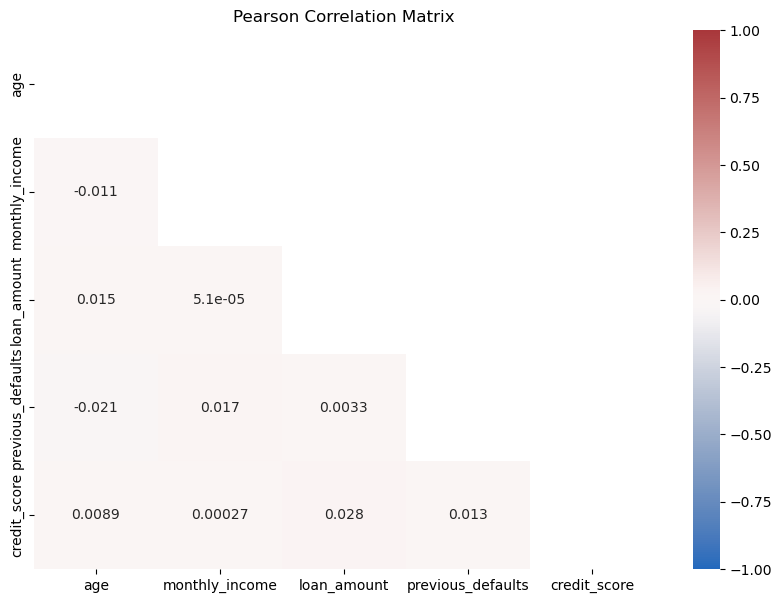

In [34]:
X = df_clean.drop(columns='default').select_dtypes(include='number')
corr = X.corr(method='pearson')

plt.figure(figsize=(10, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='vlag', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Pearson Correlation Matrix')
plt.show()

Tidak ada multicollinearity, sehingga fitur yang tersedia dapat digunakan untuk proses modelling.

## Train-Test Split

In [37]:
train, test = train_test_split(df_clean, stratify=df_clean['default'], random_state=42, test_size=0.2)
display(train.shape, test.shape)

(4800, 6)

(1200, 6)

## PREPROCESSING

In [39]:
X_train = train.drop("default",axis=1)
y_train = train["default"]

X_test = test.drop("default",axis=1)
y_test = test["default"]

In [40]:
# Define features
features = X_train.columns.tolist()
features

['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

In [41]:
# Define the transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])   

# Define the preprocessor with the addition of BinaryEncoder for county column
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, features)
], remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'monthly_income', 'loan_amount',
                                  'previous_defaults', 'credit_score'])])

## LOGISTIC REGRESSION

### BASELINE LOGREG

In [44]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("sampler", SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'sampler': [SMOTE(random_state=42), RandomOverSampler(random_state=42), RandomUnderSampler(random_state=42)],
        'classifier': [LogisticRegression(random_state=42)]
    },
]

# Define scoring as a dictionary
scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=scoring,refit = 'roc_auc', error_score="raise")

start_time = time.time()


gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 6.07 seconds


In [45]:
pd.DataFrame(gscv.cv_results_).sort_values(by='mean_test_roc_auc', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_sampler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
2,0.017623,0.003130,0.017504,0.003812,LogisticRegression(random_state=42),RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(random_state...,0.760705,0.869336,0.751582,0.772152,0.835795,0.797914,0.046327,1,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
1,0.021208,0.004867,0.012735,0.002363,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'classifier': LogisticRegression(random_state...,0.728614,0.858416,0.719673,0.765120,0.853991,0.785163,0.059986,2,0.636364,1.000000,0.583333,0.666667,0.916667,0.760606,0.165741,2
0,0.033899,0.006085,0.020852,0.006164,LogisticRegression(random_state=42),SMOTE(random_state=42),{'classifier': LogisticRegression(random_state...,0.729093,0.853243,0.716772,0.763010,0.854255,0.783274,0.059502,3,0.545455,0.909091,0.583333,0.666667,0.916667,0.724242,0.158954,3


In [46]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_income',
                                                   'loan_amount',
                                                   'previous_defaults',
                                                   'credit_score'])])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

ROC AUC Score - Train: 0.7994
ROC AUC Score - Test:  0.7721

Recall Score - Train: 0.7241
Recall Score - Test:  0.6000

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      4742
           1       0.03      0.72      0.06        58

    accuracy                           0.71      4800
   macro avg       0.51      0.72      0.44      4800
weighted avg       0.98      0.71      0.82      4800


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1185
           1       0.03      0.60      0.05        15

    accuracy                           0.71      1200
   macro avg       0.51      0.66      0.44      1200
weighted avg       0.98      0.71      0.82      1200



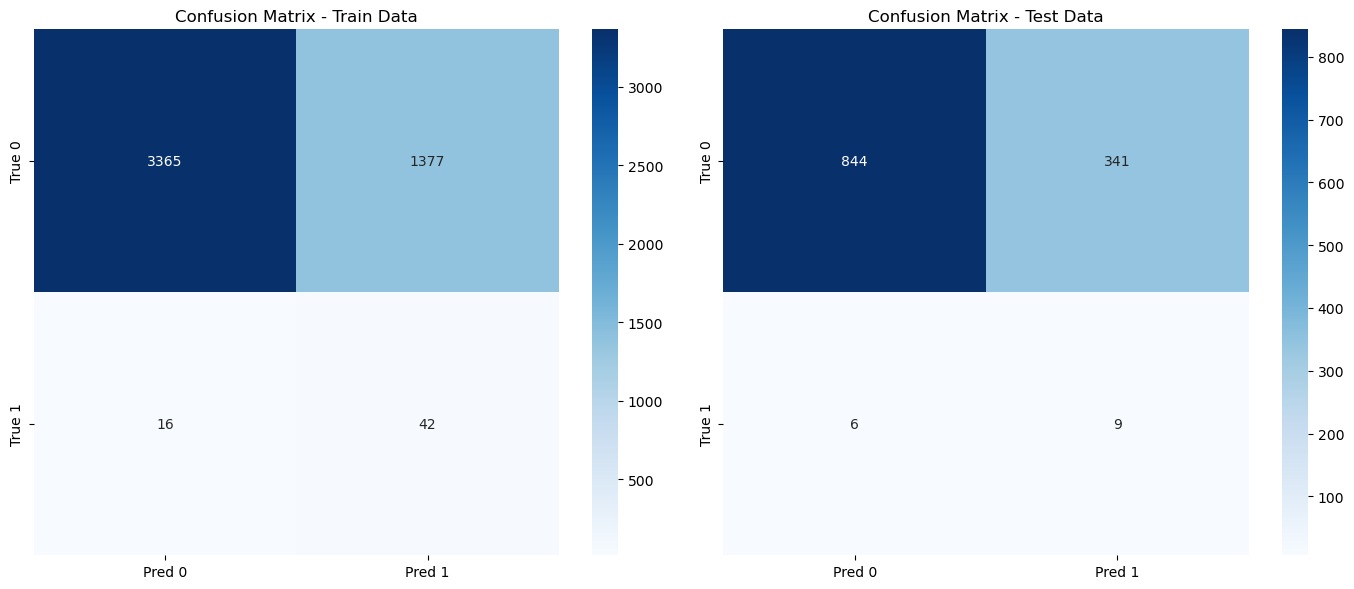

In [47]:
evaluate_model(gscv.best_estimator_, X_train, X_test, y_train, y_test)

### HYPERPARAMETER TUNING - LOGREG

In [49]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import time

# Define pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("sampler", SMOTE(random_state=42)),  # default placeholder
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))  # default placeholder
])

# Define param grid for Logistic Regression tuning
param_grid = {
    'sampler': [
        SMOTE(random_state=42), 
        RandomOverSampler(random_state=42), 
        RandomUnderSampler(random_state=42)
    ],
    'classifier': [LogisticRegression(max_iter=1000, random_state=42)],
    'classifier__penalty': ['l2', None],  # 'l2' for regularized, 'none' for unregularized
    'classifier__C': [0.01, 0.1, 1, 10],    # lower = stronger regularization
    'classifier__solver': ['lbfgs']         # 'lbfgs' supports 'l2' and 'none'
}

# Define scoring
scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

# GridSearchCV setup
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring=scoring,
    refit='roc_auc',
    error_score="raise"
)

# Fit and measure time
start_time = time.time()
gscv.fit(X_train, y_train)
fitting_time = time.time() - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")


Fitting time: 0.59 seconds


In [50]:
pd.DataFrame(gscv.cv_results_).sort_values(by='mean_test_roc_auc', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_sampler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
8,0.023864,0.009865,0.017697,0.002709,"LogisticRegression(max_iter=1000, random_state...",0.1,l2,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.753425,0.871731,0.780503,0.769866,0.834300,0.801965,0.044181,1,0.727273,1.000000,0.583333,0.666667,0.833333,0.762121,0.144186,8
2,0.014232,0.001639,0.013901,0.002722,"LogisticRegression(max_iter=1000, random_state...",0.01,l2,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.740971,0.872497,0.801600,0.764680,0.820851,0.800120,0.045662,2,0.727273,1.000000,0.750000,0.666667,0.750000,0.778788,0.114732,7
14,0.016714,0.004095,0.016428,0.003187,"LogisticRegression(max_iter=1000, random_state...",1,l2,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.760705,0.869336,0.751582,0.772152,0.835795,0.797914,0.046327,3,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
23,0.015147,0.004045,0.015371,0.008157,"LogisticRegression(max_iter=1000, random_state...",10,None,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.762525,0.867803,0.747275,0.772855,0.835531,0.797198,0.046350,4,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
5,0.026384,0.008114,0.026942,0.007508,"LogisticRegression(max_iter=1000, random_state...",0.01,None,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.762525,0.867803,0.747275,0.772855,0.835531,0.797198,0.046350,4,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
11,0.018660,0.002721,0.022726,0.013494,"LogisticRegression(max_iter=1000, random_state...",0.1,None,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.762525,0.867803,0.747275,0.772855,0.835531,0.797198,0.046350,4,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
17,0.023904,0.010914,0.016679,0.005122,"LogisticRegression(max_iter=1000, random_state...",1,None,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.762525,0.867803,0.747275,0.772855,0.835531,0.797198,0.046350,4,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
20,0.015158,0.002323,0.023670,0.015113,"LogisticRegression(max_iter=1000, random_state...",10,l2,lbfgs,RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.762238,0.867995,0.747363,0.772591,0.835619,0.797161,0.046475,8,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
1,0.020856,0.001376,0.015561,0.000975,"LogisticRegression(max_iter=1000, random_state...",0.01,l2,lbfgs,RandomOverSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.727369,0.859948,0.723365,0.764768,0.854694,0.786029,0.059998,9,0.636364,1.000000,0.583333,0.666667,0.916667,0.760606,0.165741,9
7,0.032954,0.007968,0.018534,0.001644,"LogisticRegression(max_iter=1000, random_state...",0.1,l2,lbfgs,RandomOverSampler(random_state=42),{'classifier': LogisticRegression(max_iter=100...,0.728805,0.858416,0.719673,0.765295,0.854430,0.785324,0.060039,10,0.636364,1.000000,0.583333,0.666667,0.916667,0.760606,0.165741,9


In [51]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_income',
                                                   'loan_amount',
                                                   'previous_defaults',
                                                   'credit_score'])])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

ROC AUC Score - Train: 0.8016
ROC AUC Score - Test:  0.7752

Recall Score - Train: 0.7069
Recall Score - Test:  0.6000

Classification Report - Train Data
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      4742
           1       0.03      0.71      0.06        58

    accuracy                           0.71      4800
   macro avg       0.51      0.71      0.44      4800
weighted avg       0.98      0.71      0.82      4800


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      1185
           1       0.03      0.60      0.05        15

    accuracy                           0.72      1200
   macro avg       0.51      0.66      0.44      1200
weighted avg       0.98      0.72      0.83      1200



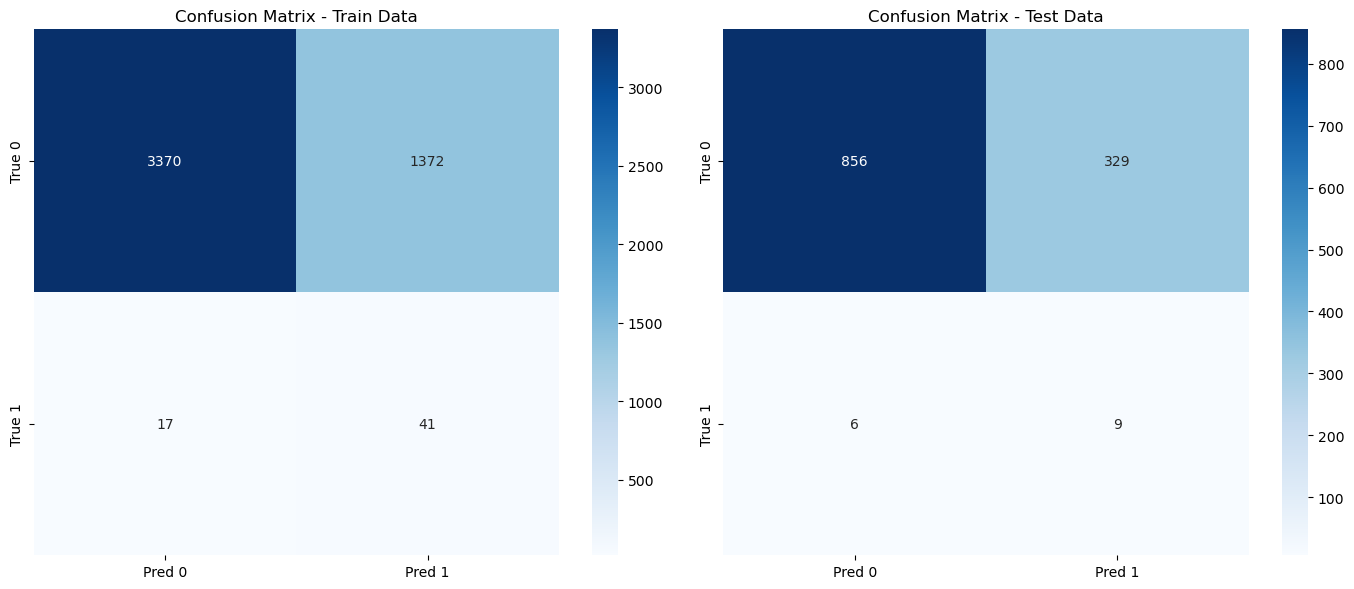

In [52]:
evaluate_model(gscv.best_estimator_, X_train, X_test, y_train, y_test)

## GRADIENT BOOSTING

### Baseline GradientBoosting

In [55]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("sampler", SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

param_grid = [
    {
        'sampler': [SMOTE(random_state=42), RandomOverSampler(random_state=42), RandomUnderSampler(random_state=42)],
        'classifier': [GradientBoostingClassifier(random_state=42)]
    },
]

# Define scoring as a dictionary
scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=scoring,refit = 'roc_auc', error_score="raise")

start_time = time.time()


gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 2.52 seconds


In [56]:
pd.DataFrame(gscv.cv_results_).sort_values(by='mean_test_roc_auc', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_sampler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
1,1.146428,0.045641,0.018920,0.002736,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.714915,0.875084,0.730617,0.733562,0.738660,0.758568,0.058795,1,0.181818,0.545455,0.333333,0.416667,0.166667,0.328788,0.143228,3
0,1.634351,0.011199,0.010784,0.000444,GradientBoostingClassifier(random_state=42),SMOTE(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.735511,0.827474,0.697609,0.669743,0.792106,0.744489,0.058342,2,0.454545,0.545455,0.416667,0.333333,0.333333,0.416667,0.079887,2
2,0.202636,0.030930,0.016704,0.001473,GradientBoostingClassifier(random_state=42),RandomUnderSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.717118,0.825175,0.641702,0.713300,0.689522,0.717363,0.060232,3,0.636364,0.727273,0.500000,0.583333,0.666667,0.622727,0.077020,1


In [57]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_income',
                                                   'loan_amount',
                                                   'previous_defaults',
                                                   'credit_score'])])),
                ('sampler', RandomOverSampler(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

ROC AUC Score - Train: 0.9908
ROC AUC Score - Test:  0.5476

Recall Score - Train: 1.0000
Recall Score - Test:  0.1333

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4742
           1       0.13      1.00      0.23        58

    accuracy                           0.92      4800
   macro avg       0.56      0.96      0.59      4800
weighted avg       0.99      0.92      0.95      4800


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1185
           1       0.02      0.13      0.04        15

    accuracy                           0.91      1200
   macro avg       0.50      0.53      0.50      1200
weighted avg       0.98      0.91      0.94      1200



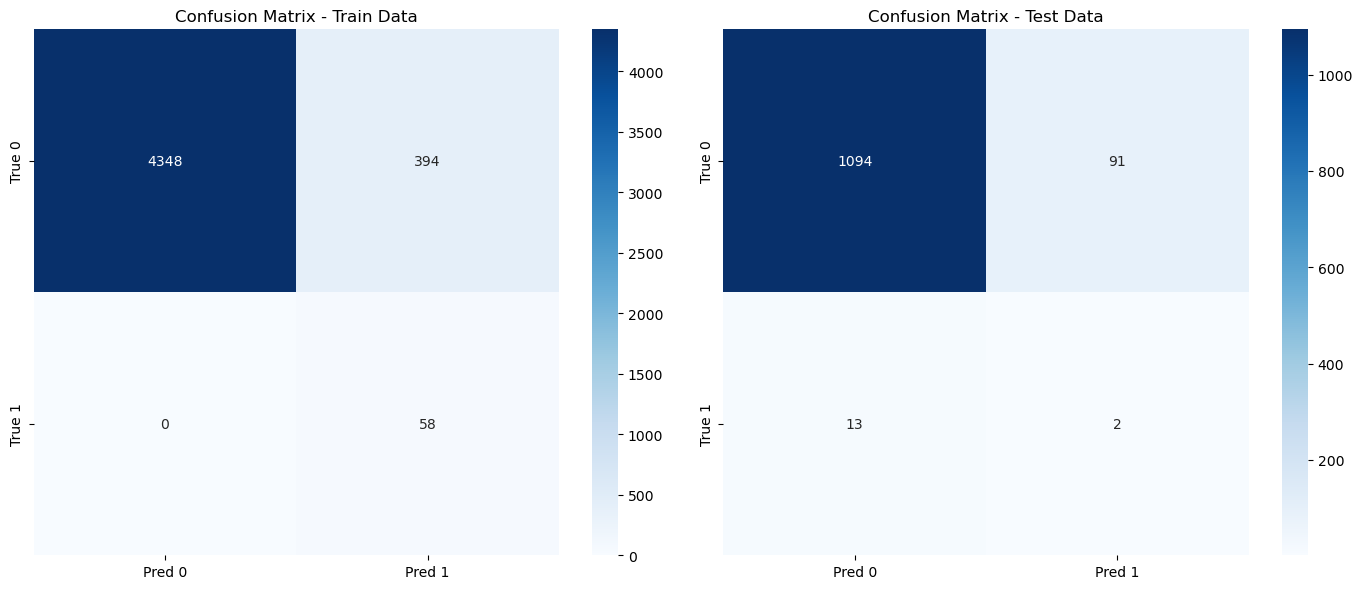

In [58]:
evaluate_model(gscv.best_estimator_, X_train, X_test, y_train, y_test)

### Hyperparameter Tuning - GradientBoosting

In [107]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression  # Used for feature selection
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import time

# Updated pipeline with feature selection step
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # include scaler if needed in your preprocessor
    ("sampler", SMOTE(random_state=42)),  # placeholder
    ("classifier", GradientBoostingClassifier(random_state=42))  # placeholder
])

# Define param grid (add threshold tuning for feature selection optionally)
param_grid = {
    'sampler': [
        SMOTE(random_state=42),
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42)
    ],
    'classifier': [GradientBoostingClassifier(random_state=42)],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

# Scoring metrics
scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

# GridSearchCV setup
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring=scoring,
    refit='roc_auc',
    error_score="raise"
)

# Fit
start_time = time.time()
gscv.fit(X_train, y_train)
fitting_time = time.time() - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")


Fitting time: 66.93 seconds


In [108]:
pd.DataFrame(gscv.cv_results_).sort_values(by='mean_test_roc_auc', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_sampler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
3,9.126082,0.983957,0.071616,0.025342,GradientBoostingClassifier(random_state=42),0.01,3,200,SMOTE(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.732015,0.893189,0.733430,0.725870,0.831531,0.783207,0.067553,1,0.545455,0.909091,0.583333,0.500000,0.833333,0.674242,0.164727,3
4,4.921638,0.658264,0.066836,0.007342,GradientBoostingClassifier(random_state=42),0.01,3,200,RandomOverSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.702558,0.920395,0.757867,0.735935,0.768152,0.776981,0.075146,2,0.545455,0.909091,0.666667,0.583333,0.416667,0.624242,0.163650,11
6,8.035503,0.831919,0.046451,0.015084,GradientBoostingClassifier(random_state=42),0.01,5,100,SMOTE(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.711802,0.906073,0.708993,0.673479,0.844146,0.768899,0.089925,3,0.545455,0.909091,0.666667,0.416667,0.750000,0.657576,0.168815,5
0,3.621800,0.052828,0.037244,0.003816,GradientBoostingClassifier(random_state=42),0.01,3,100,SMOTE(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.702366,0.889645,0.732463,0.711498,0.804677,0.768130,0.070577,4,0.636364,0.818182,0.666667,0.583333,0.833333,0.707576,0.100229,2
9,14.430303,1.614841,0.060580,0.009349,GradientBoostingClassifier(random_state=42),0.01,5,200,SMOTE(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.700067,0.876521,0.730573,0.702532,0.822169,0.766372,0.070710,5,0.363636,0.545455,0.583333,0.500000,0.500000,0.498485,0.074289,15
13,2.505932,0.371102,0.035560,0.006318,GradientBoostingClassifier(random_state=42),0.1,3,100,RandomOverSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.714915,0.875084,0.730617,0.733562,0.738660,0.758568,0.058795,6,0.181818,0.545455,0.333333,0.416667,0.166667,0.328788,0.143228,19
1,2.241351,0.120363,0.038451,0.005950,GradientBoostingClassifier(random_state=42),0.01,3,100,RandomOverSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.673771,0.902577,0.755626,0.722090,0.715937,0.754000,0.078716,7,0.454545,0.909091,0.750000,0.583333,0.500000,0.639394,0.168352,8
2,0.374276,0.011178,0.034804,0.003958,GradientBoostingClassifier(random_state=42),0.01,3,100,RandomUnderSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.728279,0.852907,0.702004,0.779052,0.706707,0.753790,0.056589,8,0.545455,0.909091,0.750000,0.666667,0.750000,0.724242,0.118976,1
10,9.097889,1.707975,0.063197,0.011906,GradientBoostingClassifier(random_state=42),0.01,5,200,RandomOverSampler(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.705000,0.910719,0.751187,0.675325,0.696554,0.747757,0.085164,9,0.454545,0.545455,0.583333,0.250000,0.166667,0.400000,0.164127,17
12,4.186794,0.700615,0.040165,0.010646,GradientBoostingClassifier(random_state=42),0.1,3,100,SMOTE(random_state=42),{'classifier': GradientBoostingClassifier(rand...,0.735511,0.827474,0.697609,0.669743,0.792106,0.744489,0.058342,10,0.454545,0.545455,0.416667,0.333333,0.333333,0.416667,0.079887,16


In [109]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_income',
                                                   'loan_amount',
                                                   'previous_defaults',
                                                   'credit_score'])])),
                ('sampler', SMOTE(random_state=42)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=200,
                                            random_state=42))])

ROC AUC Score - Train: 0.8954
ROC AUC Score - Test:  0.6844

Recall Score - Train: 0.8621
Recall Score - Test:  0.3333

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      4742
           1       0.05      0.86      0.09        58

    accuracy                           0.80      4800
   macro avg       0.52      0.83      0.49      4800
weighted avg       0.99      0.80      0.88      4800


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1185
           1       0.02      0.33      0.04        15

    accuracy                           0.79      1200
   macro avg       0.50      0.56      0.46      1200
weighted avg       0.98      0.79      0.87      1200



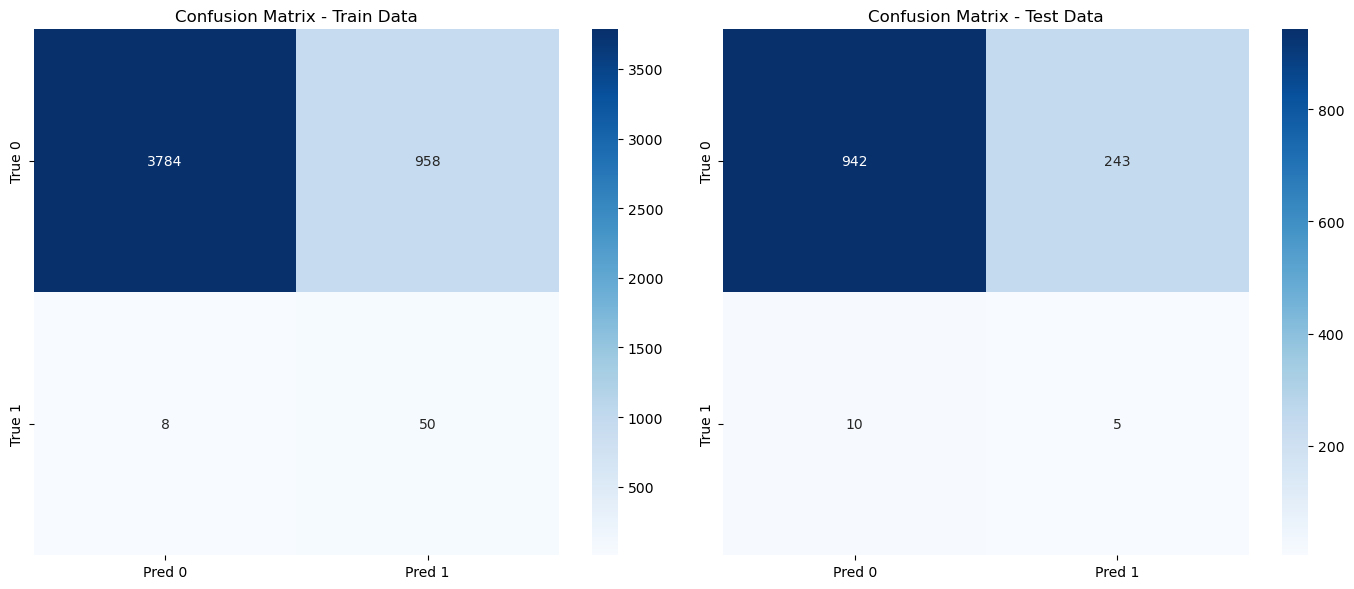

In [110]:
evaluate_model(gscv.best_estimator_, X_train, X_test, y_train, y_test)

## PEMILIHAN MODEL

Berdasarkan hasil modelling tersebut, baseline logistic regression +  Random Oversampler dipilih, karena menghasilkan auc score paling tinggi dibandingkan model yang lain, serta model yang stabil (perbedaan train vs test hanya sedikit)

**Model Terpilih**

In [116]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("sampler", SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'sampler': [SMOTE(random_state=42), RandomOverSampler(random_state=42), RandomUnderSampler(random_state=42)],
        'classifier': [LogisticRegression(random_state=42)]
    },
]

# Define scoring as a dictionary
scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=scoring,refit = 'roc_auc', error_score="raise")

start_time = time.time()


gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 0.15 seconds


In [117]:
pd.DataFrame(gscv.cv_results_).sort_values(by='mean_test_roc_auc', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_sampler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
2,0.029987,0.007219,0.021093,0.007882,LogisticRegression(random_state=42),RandomUnderSampler(random_state=42),{'classifier': LogisticRegression(random_state...,0.760705,0.869336,0.751582,0.772152,0.835795,0.797914,0.046327,1,0.818182,1.000000,0.583333,0.666667,0.833333,0.780303,0.144377,1
1,0.039490,0.010536,0.030127,0.004344,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'classifier': LogisticRegression(random_state...,0.728614,0.858416,0.719673,0.765120,0.853991,0.785163,0.059986,2,0.636364,1.000000,0.583333,0.666667,0.916667,0.760606,0.165741,2
0,0.035291,0.004750,0.037196,0.008765,LogisticRegression(random_state=42),SMOTE(random_state=42),{'classifier': LogisticRegression(random_state...,0.729093,0.853243,0.716772,0.763010,0.854255,0.783274,0.059502,3,0.545455,0.909091,0.583333,0.666667,0.916667,0.724242,0.158954,3


In [120]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_income',
                                                   'loan_amount',
                                                   'previous_defaults',
                                                   'credit_score'])])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

ROC AUC Score - Train: 0.7994
ROC AUC Score - Test:  0.7721

Recall Score - Train: 0.7241
Recall Score - Test:  0.6000

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      4742
           1       0.03      0.72      0.06        58

    accuracy                           0.71      4800
   macro avg       0.51      0.72      0.44      4800
weighted avg       0.98      0.71      0.82      4800


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1185
           1       0.03      0.60      0.05        15

    accuracy                           0.71      1200
   macro avg       0.51      0.66      0.44      1200
weighted avg       0.98      0.71      0.82      1200



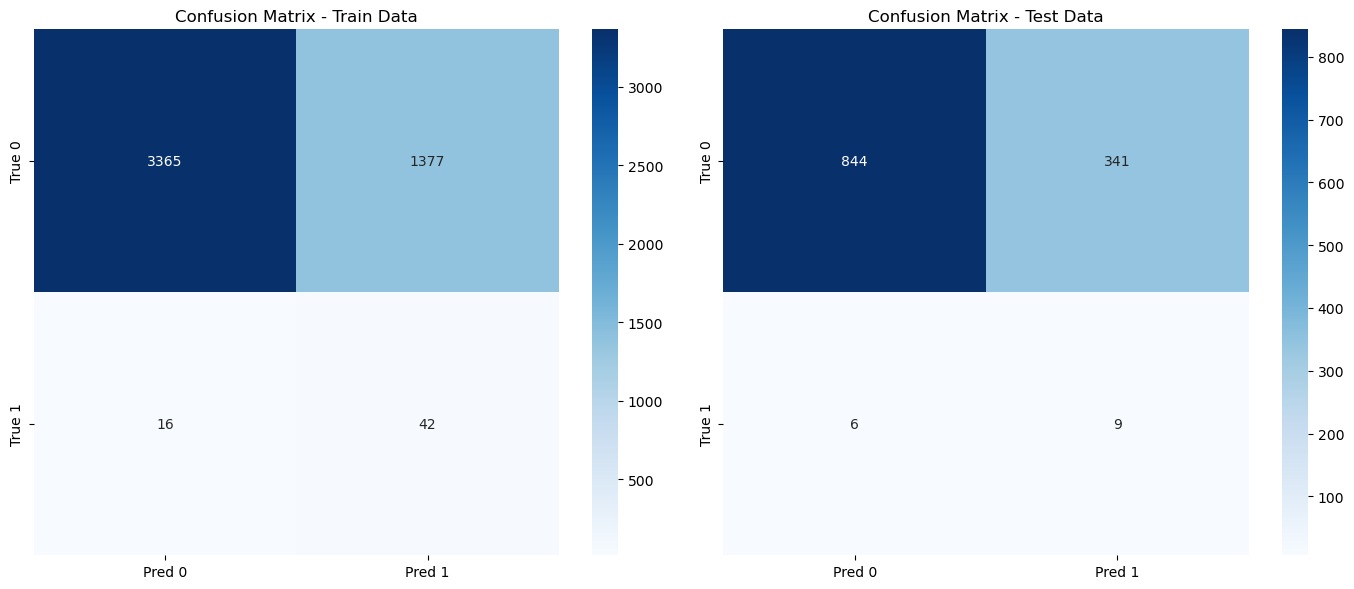

In [122]:
evaluate_model(gscv.best_estimator_, X_train, X_test, y_train, y_test)

In [126]:
model = gscv.best_estimator_

# FUNGSI SCORECARD

Untuk metode fungsi score card yang saya gunakan adalah konversi probabilitas dari prediksi model menjadi rentang 300-850 secara linear.



$\text{Score} = \text{min\_score} + (\text{max\_score} - \text{min\_score}) \times (1 - \text{prob})$


Metode lain yang dapat digunakan adalah konversi dengan fungsi logit (log-odds) dari prediksi model

In [136]:
def scorecard_minmax(prob, min_score=300, max_score=850):
    return np.round(min_score + (max_score - min_score) * (1 - prob))

In [138]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # probability of default

In [140]:
score = scorecard_minmax(y_prob)

In [142]:
print(score[:10])  # Show first 10 scores

[776. 482. 835. 656. 727. 784. 532. 478. 535. 769.]


# SHAP

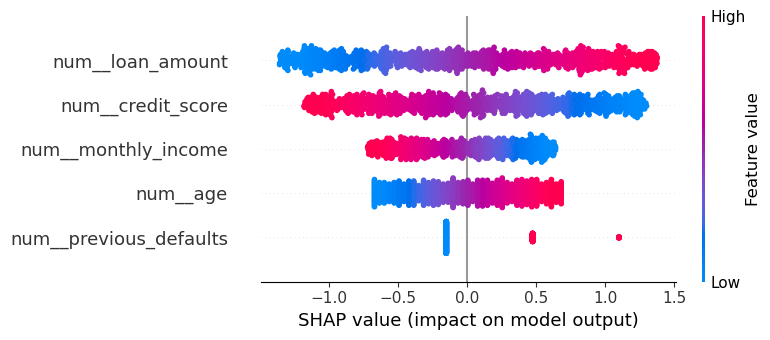

In [147]:
import shap

X_train_transformed = model.named_steps['preprocessor'].transform(X_train)

# Get the classifier
classifier = model.named_steps['classifier']

# Use SHAP for linear models (e.g., logistic regression)
explainer = shap.LinearExplainer(classifier, X_train_transformed, feature_perturbation="interventional")

# Transform test data
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Plot top 10 features
shap.summary_plot(shap_values, X_test_transformed, feature_names=model.named_steps['preprocessor'].get_feature_names_out(), max_display=10)


Interpretasi SHAP:
- Semakin tinggi jumlah pinjaman, semakin tinggi resiko untuk default.
- Semakin rendah skor kredit, resiko default meningkat.
- Semakin rendah pendapatan bulanan akan meningkatkan resiko default.
- Applicant dengan usia lebih muda akan meningkatkan resiko default.
- Semakin banyak riwayat gagal bayar dari applicant akan meningkatkan resiko default.

# KEPUTUSAN : IDR 5 JUTA

Untuk menjawab case dimana applicant mengajukan pinjaman sebesar IDR 5 Juta, saya akan menggunakan rata-rata proba dari applicant yang mengajukan pinjaman pada rentang IDR 5 Juta ±5% (margin of error), yakni IDR 4,75 Juta s.d. IDR 5,25 Juta

In [174]:
# Define the range for ±5%
lower_bound = 4750000
upper_bound = 5250000

In [182]:
X_test_applicant = X_test[(X_test['loan_amount']>=lower_bound)&(X_test['loan_amount']<=upper_bound)]

In [178]:
# Get predicted probabilities
y_prob_applicant = model.predict_proba(X_test_applicant)[:, 1]
y_prob_applicant

array([0.57752565, 0.27505189, 0.51512438, 0.10780854, 0.5443497 ,
       0.40767541, 0.16196809, 0.42476191, 0.04406771, 0.22566597,
       0.09442462, 0.25264861, 0.03935495, 0.23045819, 0.28179998,
       0.14000844, 0.24222063, 0.23400091, 0.22072972, 0.36974088,
       0.12639103, 0.32232843, 0.09829985, 0.1591582 , 0.37929859,
       0.04724664, 0.14941358, 0.679137  , 0.12669885, 0.26317332,
       0.44559252, 0.07239617, 0.17496315, 0.69827127, 0.3051985 ,
       0.21030362, 0.46913034, 0.49112779, 0.256611  , 0.14923108,
       0.21842818, 0.3990618 , 0.55673388])

In [180]:
average_proba = np.mean(y_prob_applicant)
print(f"Average probability of default: {average_proba:.4f}")

Average probability of default: 0.2834


Didapatkan rata-rata proba 0,28. Diterima atau tidaknya pinjaman tentunya bergantung dari cut-off yang ditentukan oleh perusahaan. Pada proses pemodelan saya menggunakan threshold bawaan modul, yakni 0,5, sehingga applicant akan di-approve pengajuan pinjamannya.


Hal ini juga sesuai dengan eksplorasi data yang dilakukan pada grafik boxplot default vs loan_amount, dimana untuk applicant yang default, loan_amount IDR 5 juta berada di bawah Q2, yang berarti mayoritas applicant yang default, umumnya memiliki loan_amount lebih dari 5 juta.